In [47]:
#0.Importing required packages 
import pandas as pd
import numpy as np
from scipy.stats import kde
from tabulate import tabulate
import scipy.stats as stats
import scipy
import warnings
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import sys
import traceback
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import scipy.special as sse
from scipy.optimize import curve_fit
from functools import partial
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Defining some constants 
nbins=30

In [5]:
#1.Reading Data 
energydata = pd.read_csv("./energydata_complete.csv")

In [6]:
#2.Creating subsamples
#2.1.Choosing colomns
sample_energydata=energydata[[ 'date','T2', 'RH_2','T6','T_out']]
df_sample_colomn_energydata = pd.DataFrame(sample_energydata)

In [15]:
#timestamps to daily
df_sample_colomn_energydata['date']=pd.to_datetime(df_sample_colomn_energydata['date'])
df_sample_colomn_energydata['date']=df_sample_colomn_energydata['date'].dt.round('1d')  

## Step 01: Stationarity of a process (for mathematical expectation and variance)

In [48]:
def stationarity(col_name):
    #aggregation
    df_daily_T2=df_sample_colomn_energydata.groupby('date', as_index=False).agg({col_name: "sum"})
    df_daily_T2=df_daily_T2.sort_values('date')
    #plotting
    plt.figure(figsize=(8, 6))
    plt.plot(df_daily_T2['date'],df_daily_T2[col_name])
    plt.xticks(rotation=45)
    plt.xlabel(u'Date', fontsize = 20)
    plt.ylabel(u'Sum', fontsize = 20)
    plt.title(col_name, fontsize = 20)
    # Testing , lower p-value --> more stationary
    result = smt.stattools.adfuller(df_daily_T2[col_name])
    print(col_name+': Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))
    df_daily=df_daily_T2
    df_daily.index=pd.date_range(freq="m",start=df_daily_T2["date"][0],periods=len(df_daily_T2["date"]))
    #moving average
    result = seasonal_decompose((df_daily_T2[col_name]), model='additive')
    fig=result.plot()
    fig.set_figheight(6)
    fig.set_figwidth(14)
    plt.show()
    return df_daily_T2

In [50]:
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
        return pd.Series(diff)

### T2

T2: Augmented Dickey-Fuller test:
Statistic value = -3.582013
p-value = 0.006114


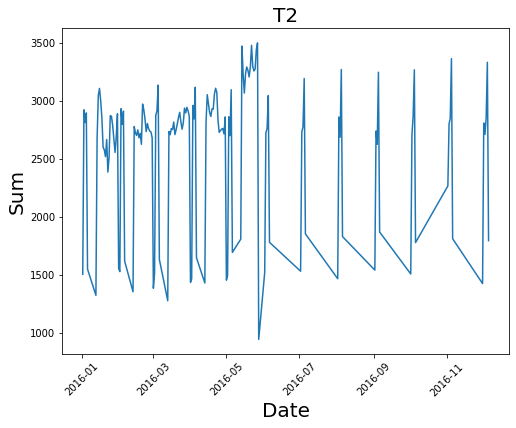

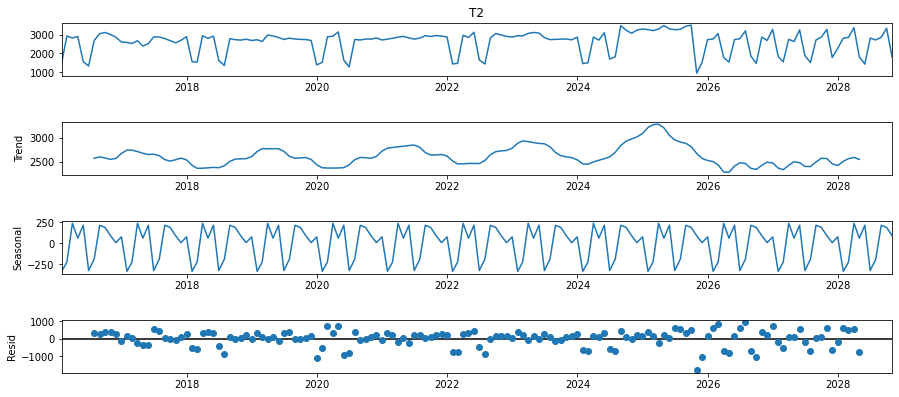

In [51]:
df_daily_T2=stationarity('T2')

RH_2: Augmented Dickey-Fuller test:
Statistic value = -4.391084
p-value = 0.000308


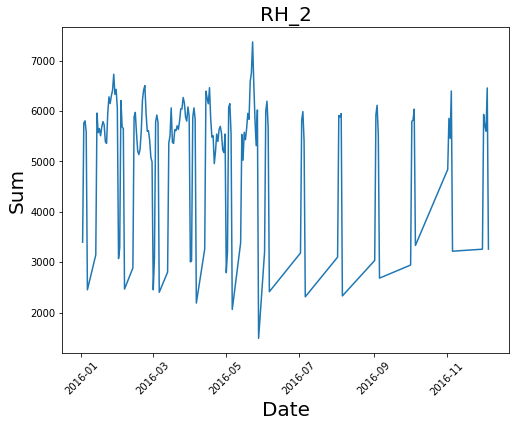

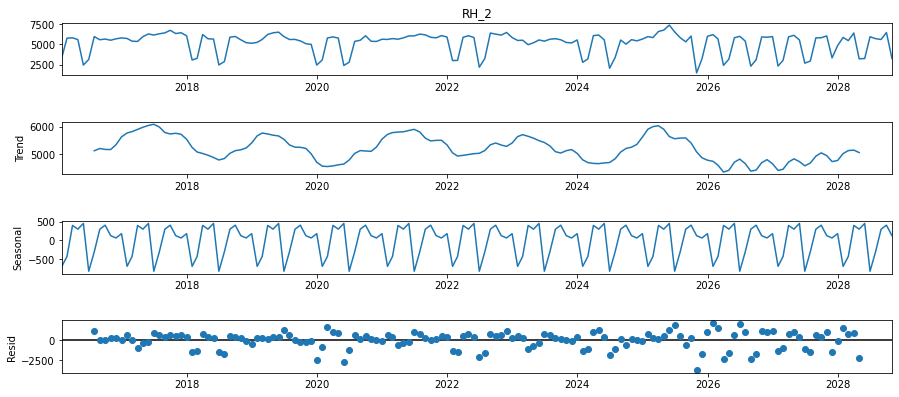

In [44]:
stationarity('RH_2')

T6: Augmented Dickey-Fuller test:
Statistic value = -3.135783
p-value = 0.024016


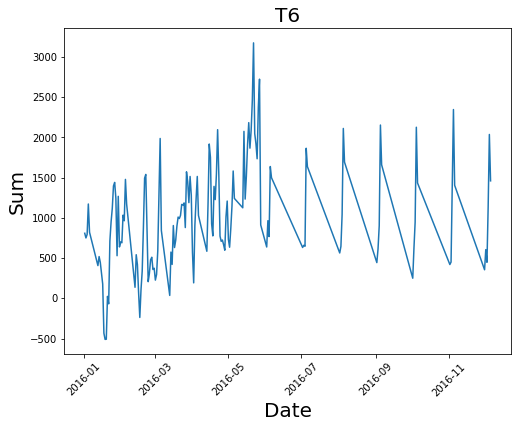

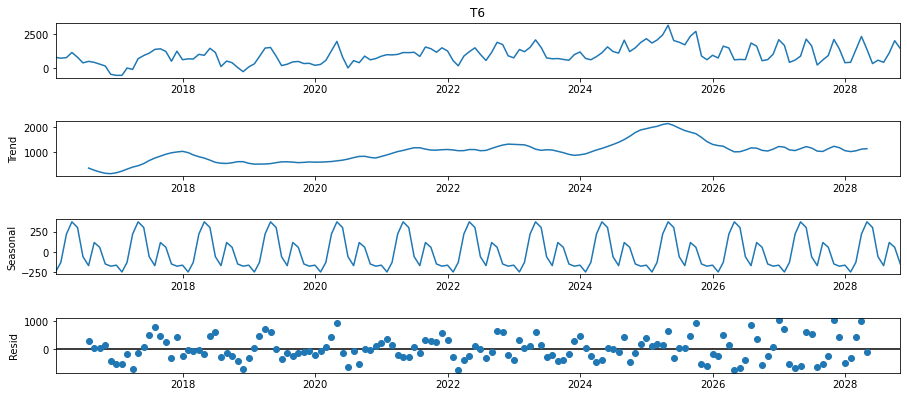

In [45]:
stationarity("T6")

T_out: Augmented Dickey-Fuller test:
Statistic value = -3.275590
p-value = 0.016005


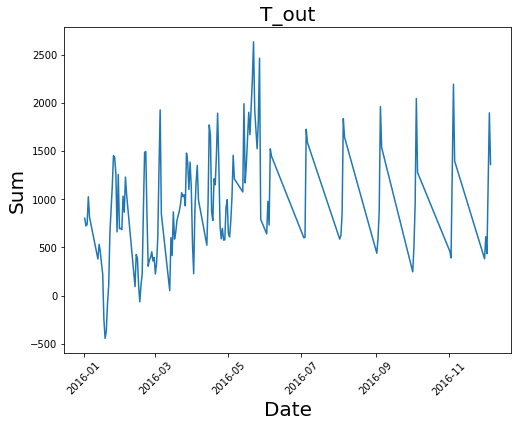

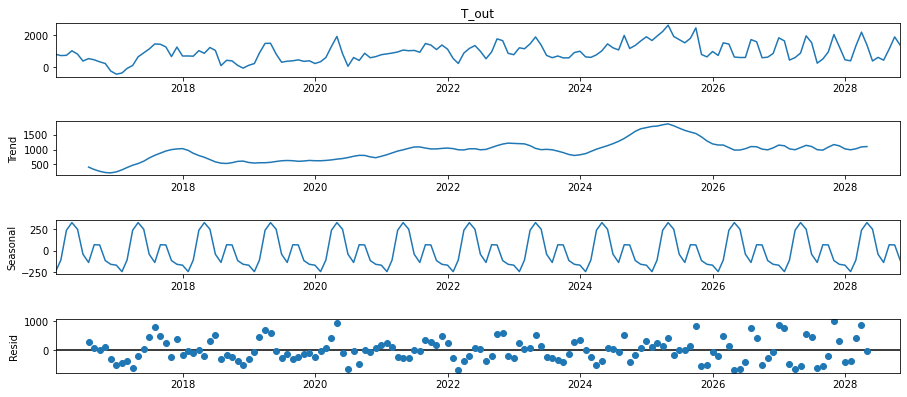

In [46]:
stationarity("T_out")

## Step 02: Analyze covariance or correlation function for chosen target variables and mutual correlation functions among predictors and targets